<a href="https://colab.research.google.com/github/edward0210/test/blob/main/cifar10_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
import numpy as np
from keras.utils import np_utils
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from PIL import Image
from keras.callbacks import EarlyStopping

In [ ]:
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype(float)/255.0
y_train = np_utils.to_categorical(y_train)

X_val = X_train[40000:]
y_val = y_train[40000:]

X_train = X_train[:40000]
y_train = y_train[:40000]

X_test = X_test.astype(float)/255.0
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]


In [ ]:
print(num_classes)

10


In [ ]:
###Model branch

#branch_a
X = tf.keras.layers.Input(shape = [32,32,3])
branch_a = tf.keras.layers.Convolution2D(32,kernel_size = 3,strides =1,padding ='same',activation = 'leaky_relu')(X)
branch_a = tf.keras.layers.MaxPooling2D()(branch_a)
branch_a = tf.keras.layers.Convolution2D(64,kernel_size =3, strides = 1, padding = 'same',activation = 'leaky_relu')(branch_a)
branch_a = tf.keras.layers.MaxPooling2D()(branch_a)
branch_a = tf.keras.layers.Convolution2D(64,kernel_size =3, strides = 1, padding = 'same',activation = 'leaky_relu')(branch_a)
branch_a = tf.keras.layers.MaxPooling2D()(branch_a)




#branch_b

branch_b = tf.keras.layers.Convolution2D(32,kernel_size = 3,strides =2,padding ='same',activation = 'leaky_relu')(X)
branch_b = tf.keras.layers.MaxPooling2D()(branch_b)
branch_b = tf.keras.layers.Convolution2D(64,kernel_size =3, strides = 1, padding = 'same',activation = 'leaky_relu')(branch_b)
branch_b = tf.keras.layers.MaxPooling2D()(branch_b)



#concatenate
output = tf.keras.layers.concatenate([branch_a,branch_b],axis=-1)
output = tf.keras.layers.Flatten()(output)
output = tf.keras.layers.Dense(120,activation = 'swish',name ='fc1')(output) 
output = tf.keras.layers.Dense(60,activation = 'swish',name ='fc2')(output)
Y1 = tf.keras.layers.Dense(10,activation = 'softmax',name = 'fc3')(output)

model1 = tf.keras.models.Model(X,Y1)

model1.compile(loss='categorical_crossentropy',metrics='accuracy')


In [ ]:
###Model2

#X = tf.keras.layers.InputLayer(shape=[32,32,3])
X = tf.keras.layers.Input(shape = [32,32,3])
H = tf.keras.layers.Convolution2D(32,kernel_size = 3,strides =(1,1),padding ='same',activation = 'leaky_relu')(X)
H = tf.keras.layers.MaxPooling2D()(H)
print(H.shape)
H = tf.keras.layers.Convolution2D(64,kernel_size =3, strides = (1,1), padding = 'same',activation = 'leaky_relu')(H)
H = tf.keras.layers.MaxPooling2D()(H)
H = tf.keras.layers.Convolution2D(64,kernel_size =3, strides = (1,1), padding = 'same',activation = 'leaky_relu')(H)
H = tf.keras.layers.MaxPooling2D()(H)
H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120,activation = 'swish',name ='fc1')(H) 
H = tf.keras.layers.Dense(60,activation = 'swish',name ='fc2')(H)
Y2 = tf.keras.layers.Dense(10,activation = 'softmax',name = 'fc3')(H)


model2 = tf.keras.models.Model(X,Y2)

model2.compile(loss='categorical_crossentropy',metrics='accuracy')


(None, 16, 16, 32)


In [ ]:
early_stopping = EarlyStopping(monitor = 'val_loss',patience=50, verbose =1, mode= 'auto', restore_best_weights=True)

In [34]:
hist1 = model1.fit(X_train, y_train, epochs=10, callbacks=[early_stopping],validation_data =(X_val,y_val))#batch_size = 4000, 

Epoch 1/10
1250/1250 [==============================] - 129s 104ms/step - loss: 0.1325 - accuracy: 0.9633 - val_loss: 2.6846 - val_accuracy: 0.7063
Epoch 2/10
1250/1250 [==============================] - 126s 101ms/step - loss: 0.1381 - accuracy: 0.9633 - val_loss: 2.8491 - val_accuracy: 0.7093
Epoch 3/10
1250/1250 [==============================] - 129s 103ms/step - loss: 0.1289 - accuracy: 0.9645 - val_loss: 2.9914 - val_accuracy: 0.7126
Epoch 4/10
1250/1250 [==============================] - 129s 103ms/step - loss: 0.1270 - accuracy: 0.9659 - val_loss: 2.9144 - val_accuracy: 0.7101
Epoch 5/10
1250/1250 [==============================] - 129s 103ms/step - loss: 0.1298 - accuracy: 0.9673 - val_loss: 3.4539 - val_accuracy: 0.7090
Epoch 6/10
1250/1250 [==============================] - 128s 102ms/step - loss: 0.1287 - accuracy: 0.9669 - val_loss: 3.2878 - val_accuracy: 0.7054
Epoch 7/10
1250/1250 [==============================] - 129s 103ms/step - loss: 0.1321 - accuracy: 0.9670 - val_

In [35]:
hist2 = model2.fit(X_train, y_train, epochs=10, callbacks=[early_stopping],validation_data =(X_val,y_val))#batch_size = 4000,2

Epoch 1/10
1250/1250 [==============================] - 110s 87ms/step - loss: 1.4957 - accuracy: 0.4622 - val_loss: 1.3361 - val_accuracy: 0.5239
Epoch 2/10
1250/1250 [==============================] - 110s 88ms/step - loss: 1.0358 - accuracy: 0.6331 - val_loss: 1.1406 - val_accuracy: 0.6204
Epoch 3/10
1250/1250 [==============================] - 108s 86ms/step - loss: 0.8480 - accuracy: 0.7028 - val_loss: 0.9857 - val_accuracy: 0.6529
Epoch 4/10
1250/1250 [==============================] - 117s 93ms/step - loss: 0.7246 - accuracy: 0.7449 - val_loss: 0.8295 - val_accuracy: 0.7210
Epoch 5/10
1250/1250 [==============================] - 107s 86ms/step - loss: 0.6259 - accuracy: 0.7799 - val_loss: 0.8672 - val_accuracy: 0.7163
Epoch 6/10
1250/1250 [==============================] - 107s 86ms/step - loss: 0.5422 - accuracy: 0.8091 - val_loss: 0.8598 - val_accuracy: 0.7313
Epoch 7/10
1250/1250 [==============================] - 107s 85ms/step - loss: 0.4750 - accuracy: 0.8345 - val_loss: 0

In [36]:
model1.save
model2.save

<bound method Model.save of <keras.engine.functional.Functional object at 0x7fd379b087d0>>

313/313 [==============================] - 8s 25ms/step - loss: 1.1292 - accuracy: 0.7206
test lossm test acc [3.9025824069976807, 0.7059999704360962]
test lossm test acc [1.1292020082473755, 0.7206000089645386]


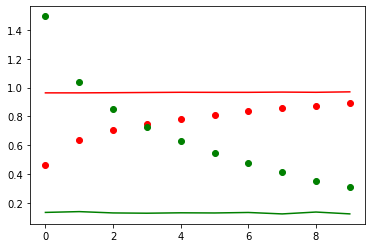

In [38]:
plt.plot(hist1.history['accuracy'],'r')
plt.plot(hist1.history['loss'],'g')

plt.plot(hist2.history['accuracy'],'ro')
plt.plot(hist2.history['loss'],'go')

pred1 = model1.predict(X_test)
result1 = model1.evaluate(X_test,y_test)#,batch_size=128)

pred2 = model2.predict(X_test)
result2 = model2.evaluate(X_test,y_test)#,batch_size=128)
#plt.plot(pred)
#result = pd.DataFrame(pred).round(2)

print('test lossm test acc',result1)
print('test lossm test acc',result2)

plt.show()

In [39]:
feat_extractor = tf.keras.models.Model(inputs=model1.input,outputs=model1.get_layer('fc2').output)

In [40]:
features = feat_extractor.predict(X_train)

In [41]:

tsne = TSNE().fit_transform(features)
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [42]:

width = 3000
height =3000
max_dim = 100
full_image = Image.new('RGB', (width, height))
#print(X_test)
for idx, x in enumerate(X_test):

    tile = Image.fromarray(np.uint8(x * 255))
    rs = max(1, tile.width / max_dim, tile.height / max_dim)
    tile = tile.resize((int(tile.width / rs),
                        int(tile.height / rs)),
                       Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim) * tx[idx]),
                            int((height-max_dim) * ty[idx])))

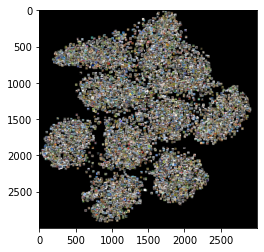

In [43]:
plt.imshow(full_image)

In [44]:
#full_image = full_image[:,:,::-1]
print(full_image.format)
#plt.imsave('d4.bmp',full_image)
full_image.save('d6.jpg')

None
